Exercice 1 :  
L’objectif de cet exercice est d’analyser les prix des Diamonds en fonction de leurs caractéristiques à 
partir du fichier diamonds.csv du TP 3.  
1- Appliquer la régression linéaire.  
2- Appliquer la régression multilinéaire. 

In [42]:
# Imports
import seaborn as sns
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import r2_score

Chargement des données dans un DataFrame

In [43]:
diamonds = pandas.read_csv("diamonds.csv")
print(diamonds.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


Transformation des données catégorielles en données numériques

In [44]:
labelEncoder = preprocessing.LabelEncoder()
diamonds["cut"] = labelEncoder.fit_transform(diamonds["cut"])
diamonds["color"] = labelEncoder.fit_transform(diamonds["color"])
diamonds["clarity"] = labelEncoder.fit_transform(diamonds["clarity"])
print(diamonds.head())

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75


Heatmap des degrés de corrélations

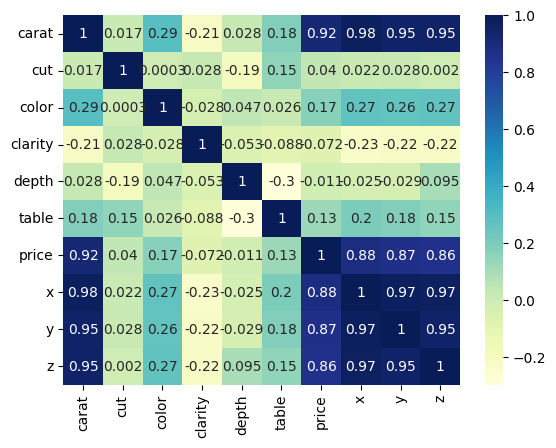

In [45]:
sns.heatmap(diamonds.corr(), cmap="YlGnBu", annot = True)
plt.show()

On constate que la paramètre ayant le plus d'impact sur le prix est le carat. Nous allons donc appliquer une régression linéaire sur ce paramètre.
Cependant, la paramètre du volume (x * y * z) semble également être un paramètre impactant.

1- Appliquer la régression linéaire. 

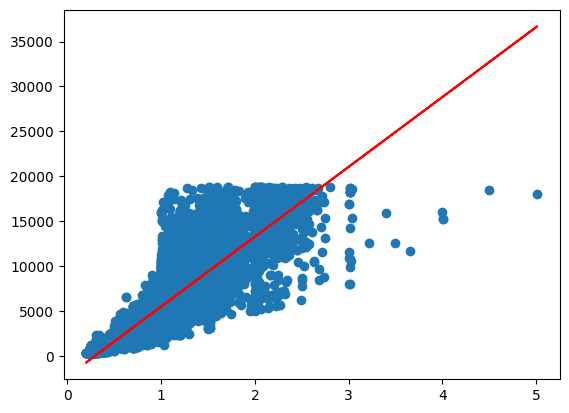

In [46]:
#Création de X et Y
X = diamonds["carat"]
Y = diamonds["price"]

#Séparation des données en entrainement et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 100)

#Ajout d'une constante pour obtenir une interception
X_train_sm = sm.add_constant(X_train)

#Ajustement de la ligne de régression en utilisant 'OLS'
lr = sm.OLS(Y_train, X_train_sm).fit()

#Visualisation de la ligne de régression
plt.scatter(X_train, Y_train)
plt.plot(X_train, lr.params[0] + lr.params[1]*X_train, "r")
plt.show()

On constate que la droite suit le nuage de points

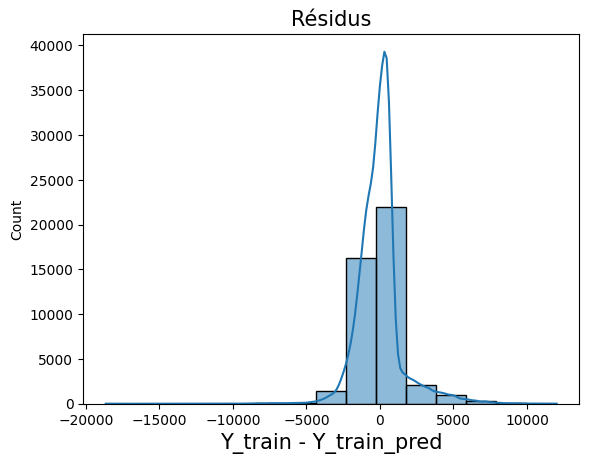

In [47]:
#Prédiction de la valeur du prix à partir des données d'entrainement de carat
Y_train_pred = lr.predict(X_train_sm)

#Création des résidues à partir des données d'entrainement de price et des données prédites de price
res = (Y_train - Y_train_pred)

#Visualisation de l'histogramme des résidus et voir si cela ressemble à une distribution normale
fig = plt.figure()
sns.histplot(res, bins = 15, kde=True)
plt.title("Résidus", fontsize = 15)
plt.xlabel("Y_train - Y_train_pred", fontsize = 15)
plt.show()

Les résidus suivent une loi normale avec la majorité de valeurs proches de 0

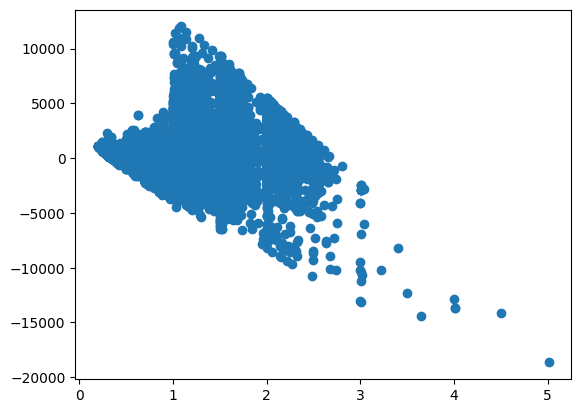

In [48]:
#Recherche de modèle spécifique suivi par les résidus
plt.scatter(X_train,res)
plt.show()

On constate que les résidus suivent un modèle. La régression linéaire n'est donc pas fiable. Nous allons donc utiliser une régression multilinéaire en incluant le volume des diamants comme nous avons déterminé plus haut que ce paramètre a un impact.

In [49]:
#Ajout d'une constante à X_test
X_test_sm = sm.add_constant(X_test)

#Prédictions des valeurs price correspondantes à X_test_sm
Y_test_pred = lr.predict(X_test_sm)

#Affichage de la valeur de R²
r_squared_train = r2_score(Y_train, Y_train_pred)
print(r_squared_train)
r_squared_test = r2_score(Y_test, Y_test_pred)
print(r_squared_test)

0.849709767427601
0.8477122571611302


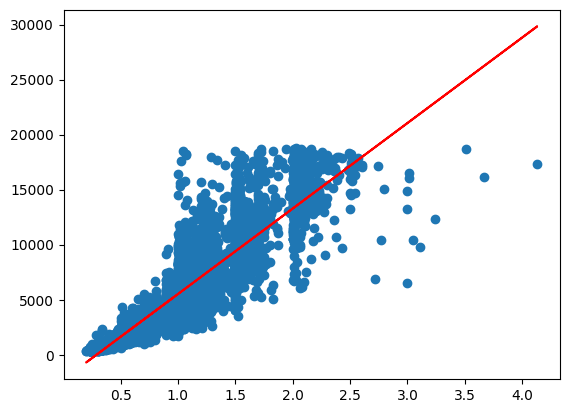

In [50]:
#Visualisation de la ligne sur les données de test
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test_pred, "r")
plt.show()

2- Appliquer la régression multilinéaire. 

In [51]:
#Création de X et Y
diamonds["Volume"] = diamonds["x"]*diamonds["y"]*diamonds["z"]

X = diamonds[["carat", "Volume"]]
Y = diamonds['price']

#Séparation des données en entrainement et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 100)

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

# Evaluation du training set
Y_train_predict = lmodellineaire.predict(X_train)
rmse = (numpy.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)
 
print("La performance du modèle sur la base d'apprentissage")
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Le score R2 est {}".format(r2))
print("\n")
 
# model evaluation for testing set
Y_test_predict = lmodellineaire.predict(X_test)
rmse = (numpy.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)
 
print("La performance du modèle sur la base de test")
print("L'erreur quadratique moyenne est {}".format(rmse))
print("Le score R2 est {}".format(r2))
print("\n")

La performance du modèle sur la base d'apprentissage
L'erreur quadratique moyenne est 1549.7578140920737
Le score R2 est 0.8498594881477048


La performance du modèle sur la base de test
L'erreur quadratique moyenne est 1539.9699613947746
Le score R2 est 0.847848579554799


